<a href="https://colab.research.google.com/github/TUQASAIF/main/blob/main/Frutisclassfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset - click https://www.kaggle.com/datasets/utkarshsaxenadn/fruits-classifications

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d sshikamaru/fruit-recognition

 87% 89.0M/102M [00:00<00:00, 83.6MB/s]
100% 102M/102M [00:01<00:00, 102MB/s]  


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-recognition.zip','r') 
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [ ]:
# generators  -- used for processing large amt of data in batches by dividing the data (image_dataset_from_directory is the generator function name) 
#REf: https://keras.io/api/data_loading/image/

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train', # copy the path of train data by right clicking the train folder
    labels='inferred', # class a will be assigned 0 and class b will be assigned 1; in this case, cat label is 0 and dog label is 1
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)  # resizing the images to a size uniformly  -- original dataset are of diff size
)

Found 16854 files belonging to 1 classes.


In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)   # images are stored as numpy array

Found 5641 files belonging to 1 classes.


In [ ]:
# Normalize  (bringing the pixel values between 0 and 1)
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

In [ ]:
train_ds = train_ds.map(process) 
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

In [ ]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
527/527 [==============================] - 1723s 3s/step - loss: 0.0013 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
527/527 [==============================] - 1718s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
527/527 [==============================] - 1750s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
527/527 [==============================] - 1687s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
527/527 [==============================] - 1674s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
527/527 [==============================] - 1664s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
527/527 [==============================] - 1694s 3s/step - loss: 0.0000e+00 - acc

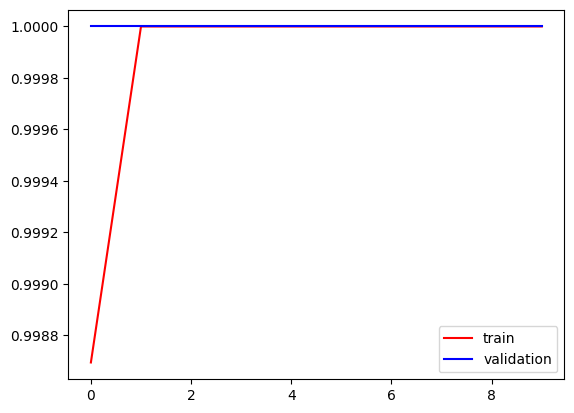

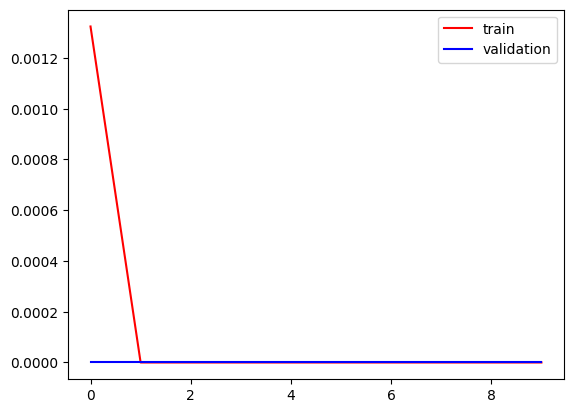

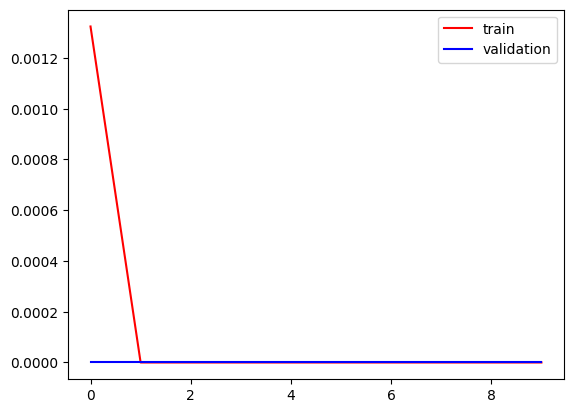

In [ ]:
"""Training accuracy is high but validation accuracy is low"""

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# remove the # from batch normalization and drop out to see if validation acc is increasing


In [1]:
# Testing phase

import cv2 #open cv library

In [16]:
test_img = cv2.imread('/content/apples/apple.100.jpg')

In [4]:
import matplotlib.pyplot as plt

TypeError: ignored

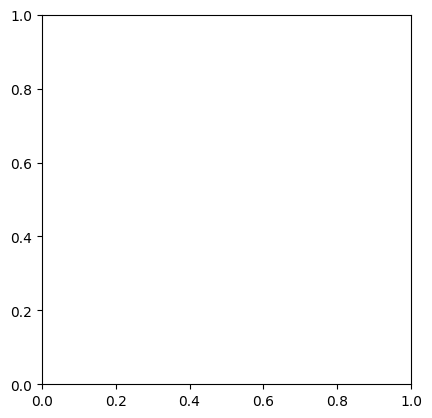

In [20]:
plt.imshow(test_img)

In [24]:
test_img.shape

AttributeError: ignored